# Line identification using ExoMolHR

*Hajime Kawahara 5/16 (2025)*


> [ExoMolHR](https://www.exomol.com/exomolhr/) is an empirical, high-resolution molecular spectrum calculator for the high-temperature
molecular line lists available from the ExoMol molecular database.    

*[Zhang et al. (2025)](https://arxiv.org/abs/2504.08731)*

ExoMolHR provides an API that delivers selected line information from ExoMol when a temperature and wavenumber range are specified. This is particularly useful in cases where it is unnecessary to use the complete but large ExoMol database directly. ExoJAX is capable of handling ExoMolHR. Here, let us use ExoMolHR from the perspective of line identification, to examine which strong lines are present at a given temperature.

To first check which molecules are available, use the following function:

In [1]:
from exojax.spec.exomolhr import list_exomolhr_molecules

molecules = list_exomolhr_molecules()
print(molecules)

['AlCl', 'AlH', 'AlO', 'C2', 'C2H2', 'CaH', 'CH4', 'CN', 'CO2', 'H2CO', 'H2O', 'H2S', 'H3+', 'H3O+', 'LiOH', 'MgH', 'NH', 'NH3', 'NO', 'SiN', 'SiO', 'SO', 'SO2', 'TiO', 'YO', 'ZrO', 'BeH', 'CaOH', 'H2CS', 'N2O', 'OCS', 'PN', 'VO']


To find the available isotopologues for each molecule, use the following function:

In [3]:
from exojax.spec.exomolhr import list_isotopologues
iso_dict = list_isotopologues(molecules)
print(iso_dict)

{'AlH': ['27Al-1H'], 'C2H2': ['12C2-1H2'], 'CN': ['12C-14N'], 'CH4': ['12C-1H4'], 'LiOH': ['6Li-16O-1H', '7Li-16O-1H'], 'H2S': ['1H2-32S'], 'NO': ['14N-16O'], 'H2O': ['1H2-16O'], 'H3O+': ['1H3-16O_p'], 'CaH': ['40Ca-1H'], 'H2CO': ['1H2-12C-16O'], 'H3+': ['1H2-2H_p', '1H3_p', '2H2-1H_p', '2H3_p'], 'NH3': ['14N-1H3', '15N-1H3'], 'AlCl': ['27Al-35Cl', '27Al-37Cl'], 'NH': ['14N-1H', '14N-2H', '15N-1H', '15N-2H'], 'SiN': ['28Si-14N', '28Si-15N', '29Si-14N', '30Si-14N'], 'MgH': ['24Mg-1H', '25Mg-1H', '26Mg-1H'], 'C2': ['12C2'], 'AlO': ['26Al-16O', '27Al-16O', '27Al-17O', '27Al-18O'], 'CO2': ['12C-16O2'], 'SiO': ['28Si-16O'], 'SO2': ['32S-16O2'], 'SO': ['32S-16O'], 'TiO': ['48Ti-16O'], 'CaOH': ['40Ca-16O-1H'], 'YO': ['89Y-16O', '89Y-17O', '89Y-18O'], 'BeH': ['9Be-1H', '9Be-2H'], 'ZrO': ['90Zr-16O', '91Zr-16O', '92Zr-16O', '93Zr-16O', '94Zr-16O', '96Zr-16O'], 'PN': ['31P-14N', '31P-15N'], 'VO': ['51V-16O'], 'H2CS': ['1H2-12C-32S'], 'OCS': ['16O-12C-32S'], 'N2O': ['14N2-16O']}


To load a molecular database, you can use XdbExomolHR. The Xdb refers to an extra database outside of Mdb, Adb, Cdb, and Pdb, and each of these has its own dedicated interface.

In [6]:
from exojax.spec.exomolhr import XdbExomolHR
from exojax.utils.grids import wavenumber_grid
import matplotlib.pyplot as plt

nus, _, _ = wavenumber_grid(22800.0, 23600.0, 10, xsmode="premodit", unit="AA")
temperature = 1300.0
iso = "1H2-16O"
xdb = XdbExomolHR(iso, nus, temperature)

xsmode =  premodit
xsmode assumes ESLOG in wavenumber space: xsmode=premodit
Your wavelength grid is in ***  descending  *** order
The wavenumber grid is in ascending order by definition.
Please be careful when you use the wavelength grid.
HITRAN exact name= H2(16O)
Downloaded and unzipped to opacity_zips/20250516113253__1H2-16O__1300.0K.csv


/home/kawahara/exojax/src/exojax/spec/unitconvert.py:82: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/grids.py:170: UserWarning: Resolution may be too small. R=260.97413588061954
  warnings.warn("Resolution may be too small. R=" + str(resolution), UserWarning)
/home/kawahara/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(


`XdbExomolHR` shares several common attributes with `MdbExomol`. However, unlike `MdbExomol`, it does not support changing the temperature or provide information such as the partition function.


In [9]:
xdb.line_strength, xdb.jlower, xdb.elower

(array([2.07935666e-33, 1.00589019e-32, 1.89912653e-36, ...,
        2.28603692e-35, 3.74997478e-32, 2.22317669e-32]),
 array([ 7,  9, 10, ..., 14,  7,  7]),
 array([13576.566165,  9837.808903, 13685.911191, ...,  5940.635876,
         7350.151429, 14753.618734]))

Now, let us get `xdb` at a given temperature over a specified wavelength range for all isotopologues available in ExoMolHR.


In [13]:

k=0
xdbs = {}
for molecule in iso_dict:
    isos = iso_dict[molecule]
    for j, iso in enumerate(isos):
        try:
            xdb = XdbExomolHR(iso, nus, temperature, crit=1.e-24)
            xdbs[iso] = xdb
        except:
            k=k+1
            print(f"No line? {iso}")
print(k, "molecules have no lines")




/home/kawahara/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:63: UserWarning: No isotope number identified.
  warnings.warn("No isotope number identified.", UserWarning)
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/spec/molinfo.py:28: UserWarning: exact molecule name is not Exomol nor HITRAN form.
  warnings.warn("exact molecule name is not Exomol nor HITRAN form.")
/home/kawahara/exojax/src/exojax/spec/molinfo.py:29

HITRAN exact name= (27Al)H
HITRAN exact name= (27Al)H
Downloaded and unzipped to opacity_zips/20250516131841__27Al-1H__1300.0K.csv
HITRAN exact name= (12C)2H2
Downloaded and unzipped to opacity_zips/20250516131843__12C2-1H2__1300.0K.csv
No line? 12C2-1H2
HITRAN exact name= (12C)(14N)
HITRAN exact name= (12C)(14N)
Downloaded and unzipped to opacity_zips/20250516131845__12C-14N__1300.0K.csv
HITRAN exact name= (12C)(1H)4
HITRAN exact name= (12C)(1H)4
Downloaded and unzipped to opacity_zips/20250516131847__12C-1H4__1300.0K.csv
HITRAN exact name= (6Li)(16O)H
HITRAN exact name= (6Li)(16O)H
Downloaded and unzipped to opacity_zips/20250516131915__6Li-16O-1H__1300.0K.csv
No line? 6Li-16O-1H
HITRAN exact name= (7Li)(16O)H
HITRAN exact name= (7Li)(16O)H
Downloaded and unzipped to opacity_zips/20250516131917__7Li-16O-1H__1300.0K.csv
No line? 7Li-16O-1H
HITRAN exact name= H2(32S)
Downloaded and unzipped to opacity_zips/20250516131918__1H2-32S__1300.0K.csv
HITRAN exact name= (14N)(16O)
Downloaded an

/home/kawahara/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:63: UserWarning: No isotope number identified.
  warnings.warn("No isotope number identified.", UserWarning)
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/spec/molinfo.py:28: UserWarning: exact molecule name is not Exomol nor HITRAN form.
  warnings.warn("exact molecule name is not Exomol nor HITRAN form.")
/home/kawahara/exojax/src/exojax/spec/molinfo.py:29

HITRAN exact name= (1H)3(16O_p)
HITRAN exact name= (1H)3(16O_p)
Downloaded and unzipped to opacity_zips/20250516131932__1H3-16O_p__1300.0K.csv
No line? 1H3-16O_p
HITRAN exact name= (40Ca)H
HITRAN exact name= (40Ca)H
Downloaded and unzipped to opacity_zips/20250516131934__40Ca-1H__1300.0K.csv
HITRAN exact name= H2(12C)(16O)
Downloaded and unzipped to opacity_zips/20250516131935__1H2-12C-16O__1300.0K.csv
HITRAN exact name= H2(2H_p)
HITRAN exact name= H2(2H_p)
Downloaded and unzipped to opacity_zips/20250516131938__1H2-2H_p__1300.0K.csv
HITRAN exact name= (1H3_p)
HITRAN exact name= (1H3_p)
Downloaded and unzipped to opacity_zips/20250516131939__1H3_p__1300.0K.csv
HITRAN exact name= D2(1H_p)
HITRAN exact name= D2(1H_p)
Downloaded and unzipped to opacity_zips/20250516131941__2H2-1H_p__1300.0K.csv
HITRAN exact name= (2H3_p)
HITRAN exact name= (2H3_p)
Downloaded and unzipped to opacity_zips/20250516131942__2H3_p__1300.0K.csv
No line? 2H3_p
HITRAN exact name= (14N)(1H)3
HITRAN exact name= (14N

/home/kawahara/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:63: UserWarning: No isotope number identified.
  warnings.warn("No isotope number identified.", UserWarning)
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/spec/molinfo.py:28: UserWarning: exact molecule name is not Exomol nor HITRAN form.
  warnings.warn("exact molecule name is not Exomol nor HITRAN form.")
/home/kawahara/exojax/src/exojax/spec/molinfo.py:29

HITRAN exact name= (26Mg)H
HITRAN exact name= (26Mg)H
Downloaded and unzipped to opacity_zips/20250516132006__26Mg-1H__1300.0K.csv
HITRAN exact name= (12C)2
HITRAN exact name= (12C)2
Downloaded and unzipped to opacity_zips/20250516132007__12C2__1300.0K.csv
HITRAN exact name= (26Al)(16O)
HITRAN exact name= (26Al)(16O)
Downloaded and unzipped to opacity_zips/20250516132009__26Al-16O__1300.0K.csv
HITRAN exact name= (27Al)(16O)
HITRAN exact name= (27Al)(16O)
Downloaded and unzipped to opacity_zips/20250516132012__27Al-16O__1300.0K.csv
HITRAN exact name= (27Al)(17O)
HITRAN exact name= (27Al)(17O)
Downloaded and unzipped to opacity_zips/20250516132014__27Al-17O__1300.0K.csv
HITRAN exact name= (27Al)(18O)
HITRAN exact name= (27Al)(18O)
Downloaded and unzipped to opacity_zips/20250516132016__27Al-18O__1300.0K.csv
HITRAN exact name= (12C)(16O)2
Downloaded and unzipped to opacity_zips/20250516132018__12C-16O2__1300.0K.csv
No line? 12C-16O2
HITRAN exact name= (28Si)(16O)
HITRAN exact name= (28Si)

/home/kawahara/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:63: UserWarning: No isotope number identified.
  warnings.warn("No isotope number identified.", UserWarning)
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/spec/molinfo.py:28: UserWarning: exact molecule name is not Exomol nor HITRAN form.
  warnings.warn("exact molecule name is not Exomol nor HITRAN form.")
/home/kawahara/exojax/src/exojax/spec/molinfo.py:29

Downloaded and unzipped to opacity_zips/20250516132051__94Zr-16O__1300.0K.csv
HITRAN exact name= (96Zr)(16O)
HITRAN exact name= (96Zr)(16O)
Downloaded and unzipped to opacity_zips/20250516132052__96Zr-16O__1300.0K.csv
HITRAN exact name= (31P)(14N)
HITRAN exact name= (31P)(14N)
Downloaded and unzipped to opacity_zips/20250516132054__31P-14N__1300.0K.csv
No line? 31P-14N
HITRAN exact name= (31P)(15N)
HITRAN exact name= (31P)(15N)
No line? 31P-15N
HITRAN exact name= (51V)(16O)
HITRAN exact name= (51V)(16O)
Downloaded and unzipped to opacity_zips/20250516132057__51V-16O__1300.0K.csv
No line? 51V-16O
HITRAN exact name= H2(12C)(32S)
HITRAN exact name= H2(12C)(32S)
Downloaded and unzipped to opacity_zips/20250516132059__1H2-12C-32S__1300.0K.csv
No line? 1H2-12C-32S
HITRAN exact name= (16O)(12C)(32S)
Downloaded and unzipped to opacity_zips/20250516132100__16O-12C-32S__1300.0K.csv
No line? 16O-12C-32S
HITRAN exact name= (14N)2(16O)
Downloaded and unzipped to opacity_zips/20250516132102__14N2-16

/home/kawahara/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/molname.py:63: UserWarning: No isotope number identified.
  warnings.warn("No isotope number identified.", UserWarning)
/home/kawahara/exojax/src/exojax/utils/molname.py:91: FutureWarning: exojax.utils.molname.exact_molname_exomol_to_simple_molname will be replaced to radis.api.exomolapi.exact_molname_exomol_to_simple_molname.
  warnings.warn(
/home/kawahara/exojax/src/exojax/spec/molinfo.py:28: UserWarning: exact molecule name is not Exomol nor HITRAN form.
  warnings.warn("exact molecule name is not Exomol nor HITRAN form.")
/home/kawahara/exojax/src/exojax/spec/molinfo.py:29: UserWarning: No molmass available
  warnings.warn("No molmass available", UserWarning)
/home/kawahara/exojax/src/exojax/utils/molname.py:197: FutureWarning: e2s will be replaced to exact_molname_exomol_to_simple_molname.
  w

Let's plot the line strength in this wavelength region. You can check which isotope has strong lines.

No line? 12C2-1H2
No line? 6Li-16O-1H
No line? 7Li-16O-1H
No line? 14N-16O
No line? 1H3-16O_p
No line? 2H3_p
No line? 27Al-35Cl
No line? 27Al-37Cl
No line? 14N-1H
No line? 15N-1H
No line? 28Si-14N
No line? 28Si-15N
No line? 29Si-14N
No line? 30Si-14N
No line? 24Mg-1H
No line? 12C-16O2
No line? 28Si-16O
No line? 32S-16O2
No line? 32S-16O
No line? 48Ti-16O
No line? 40Ca-16O-1H
No line? 89Y-16O
No line? 89Y-17O
No line? 89Y-18O
No line? 9Be-1H
No line? 31P-14N
No line? 31P-15N
No line? 51V-16O
No line? 1H2-12C-32S
No line? 16O-12C-32S


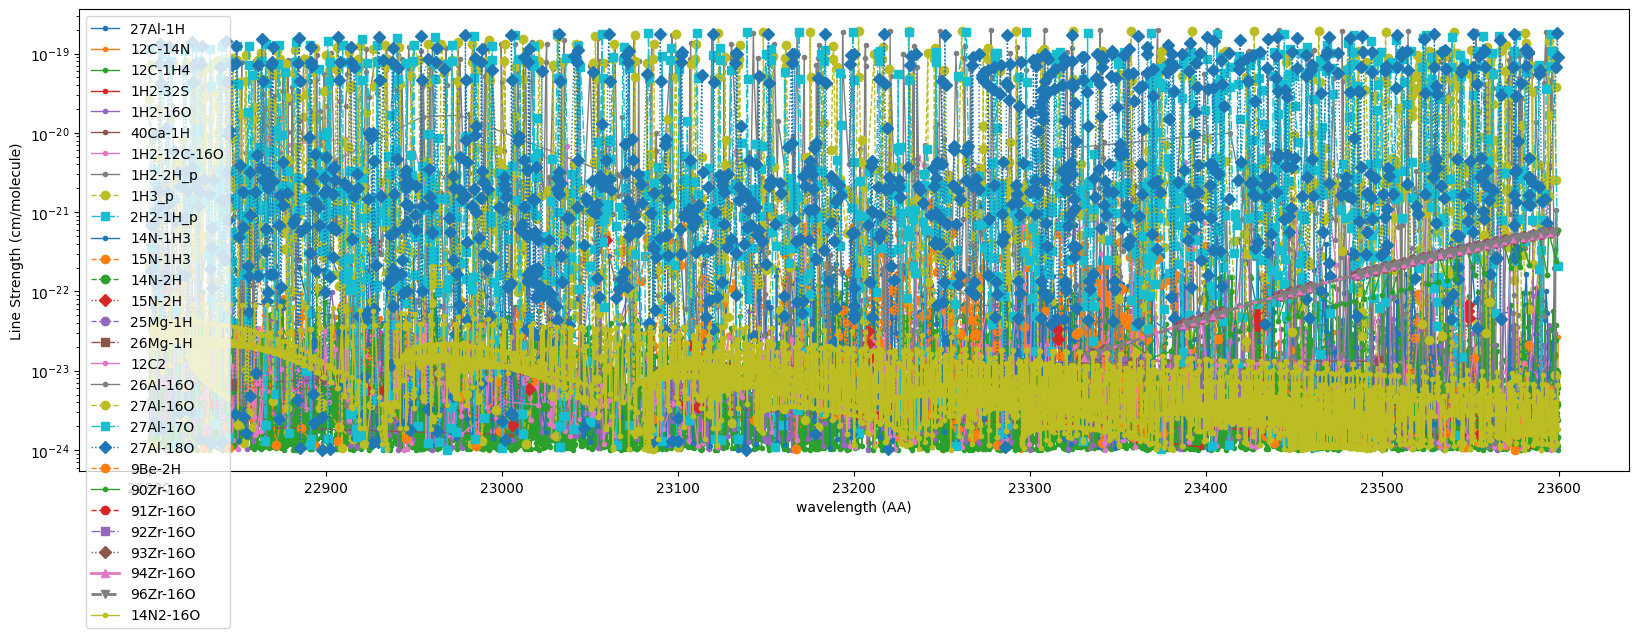

In [15]:
lslist = ["-", "--", "-.", ":", "-", "--", "-.", ":"]
lwlist = [1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0]
markers_list = [".", "o", "s", "D", "^", "v", "<", ">"]

fig = plt.figure(figsize=(20, 6)) 
for molecule in iso_dict:
    isos = iso_dict[molecule]
    for j, iso in enumerate(isos):
        try:
            xdb = xdbs[iso]
            plt.plot(1.e8/xdb.nu_lines, xdb.line_strength, markers_list[j], label=iso, ls=lslist[j], lw=lwlist[j])
        except:
            print(f"No line? {iso}")
            continue

plt.yscale("log")
plt.xlabel("wavelength (AA)")
plt.ylabel("Line Strength (cm/molecule)")
plt.legend()
plt.show()


that's it.